<a href="https://colab.research.google.com/github/fabiomiguell/AtividadesMackenzie/blob/main/PL_Atividade1_Fabio_Miguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->




# **Nome**: Fabio de Oliveira Miguel
# **Matrícula**: 92274714
---




# **Atividade 1** 
---

# **Introdução** 

A pandemia de covid-19 vitimou milhares de pessoas ao redor do mundo. Atualmente, a melhor forma de prevenção contra casos graves da doença é a vacina. No Brasil estima-se que apenas 55% da população completou o esquema vacinal contra a SARSCOV2 utilizando-se as vacinas das farmaceuticas PFIZER, AZTRAZENECA e CORONAVAC. No entanto, novas mutações da doença (variantes) vem surgindo mundo afora, sendo necessária a atualização destes imunizantes, oferecendo maior proteção contra o vírus. A matéria publicada pela BBC descreve como estas vacinas podem chegar ao Brasil.

Referência: Vacina para covid: quando imunizantes para novas variantes chegam ao Brasil? Disponível em https://www.bbc.com/portuguese/brasil-62913349. Acesso em 23/09/2022.

## Aquisição dos Dados

In [34]:
import urllib.request  

texto = []

for line in urllib.request.urlopen ('https://raw.githubusercontent.com/fabiomiguell/AtividadesMackenzie/main/Novas%20Vacinas%20Covid%20Bi%20Valentes_BBC.txt'): 
    texto.append(line.decode('utf-8'))

#exclusão de caracteres especiais
for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','')
    texto[i] = texto[i].replace('!','')
    texto[i] = texto[i].replace('"','')# elimina ' e "
    


# Construção do Dicionário

In [35]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)

{'vacina': 10, 'para': 26, 'covid:': 2, 'quando': 3, 'imunizantes': 6, 'novas': 7, 'variantes': 8, 'chegam': 1, 'ao': 12, 'brasil': 10, 'nas': 7, 'últimas': 2, 'semanas': 3, 'as': 28, 'primeiras': 1, 'vacinas': 17, 'atualizadas': 6, 'contra': 16, 'a': 85, 'covid-19': 6, 'que': 45, 'oferecem': 1, 'uma': 22, 'maior': 3, 'proteção': 3, 'mais': 16, 'recentes': 3, 'do': 36, 'coronavírus': 4, 'começaram': 2, 'ser': 6, 'aprovadas': 2, 'nos': 6, 'estados': 3, 'unidos': 3, 'no': 14, 'canadá': 2, 'na': 13, 'união': 2, 'europeia': 2, 'e': 50, 'reino': 2, 'unido': 2, 'não': 20, 'há': 7, 'porém': 1, 'qualquer': 3, 'previsão': 1, 'oficial': 1, 'de': 88, 'elas': 2, 'devem': 1, 'chegar': 1, 'entrar': 1, 'campanha': 5, 'imunização': 3, 'país': 6, 'é': 17, 'recomendável': 1, 'reforço': 3, 'da': 29, 'em': 30, 'infectados': 1, 'por': 9, 'covid': 9, 'ou': 11, 'gripe': 2, 'o': 42, 'acontece': 3, 'com': 17, 'corpo': 2, 'cada': 3, 'dia': 1, 'infecção': 3, 'fontes': 1, 'ouvidas': 1, 'pela': 3, 'bbc': 5, 'news'

# Exibição dos Resultados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


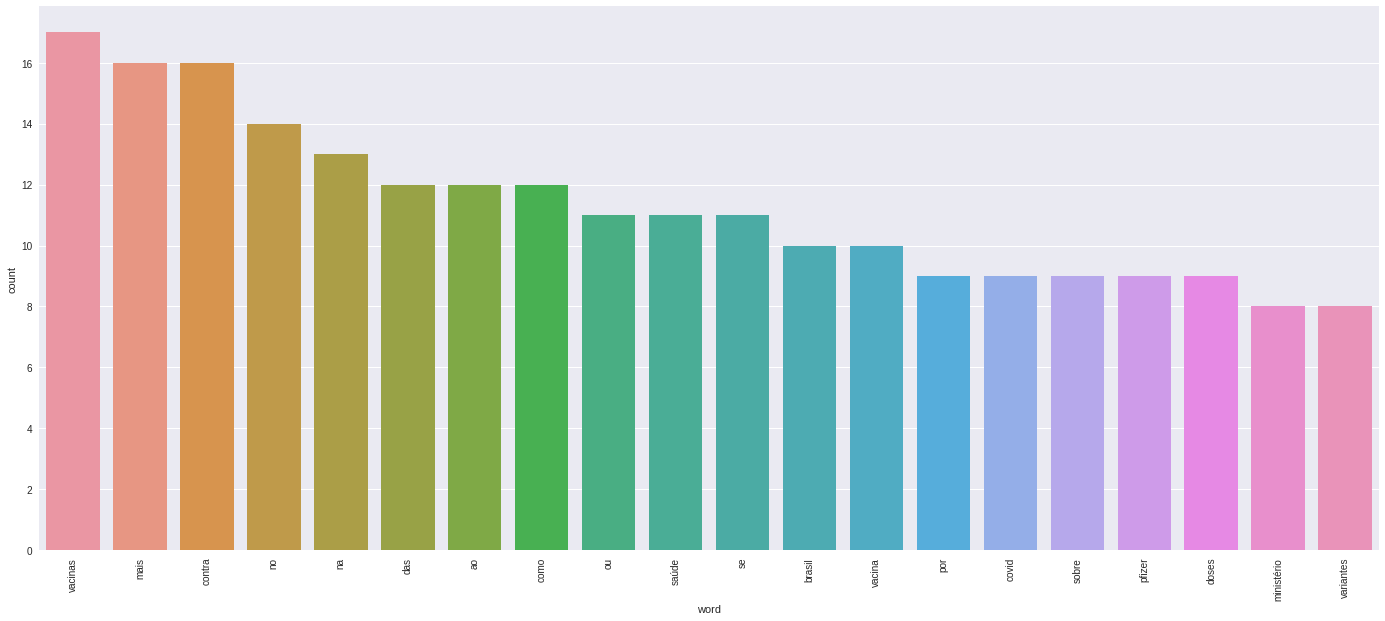

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  
                  columns=['word', 'count']).sort_values('count',ascending=False).reset_index()
df = df[df['count'] > 5] # somente termos com mais de 5 ocorrências
df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] 

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()

#**Conclusão**
---
A representação grafica do dicionário de termos acima confirma a lei de zipf, onde a palavra mais frequente ocorrerá aproximadamente duas vezes mais frequentemente do que a segunda palavra mais frequente, três vezes mais vezes que a terceira palavra mais frequente, e assim sucessivamente. 